In [1]:
!pip install -U pymoo


     |████████████████████████████████| 4.2 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 239 kB 3.2 MB/s eta 0:00:01
  Using cached future-0.18.2.tar.gz (829 kB)
  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47989 sha256=dfea235ed0321861a8206225f1d924f9bf72b3d2ae1da0209ad35e897ea1b199
  Stored in directory: /Users/negfir/Library/Caches/pip/wheels/b6/86/a9/2c2d40e3c7d837ca251d7cb66f06a283c8679fa17421e8ddeb
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491059 sha256=be90e031e7d60be25fa1cc96d95b742dc5546d424c621eca995b3c770e223760
  Stored in directory: /Users/negfir/Library/Caches/pip/wheels/2f/a0/d3/4030d9f80e6b3be787f19fc911b8e7aa462986a40ab1e4bb94
Successfully built autograd future


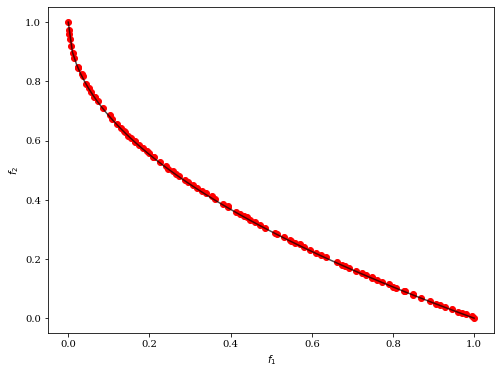

In [2]:
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt1")

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, color="red")
plot.show()

In [ ]:
from pymoo.algorithms.so_genetic_algorithm import GA
from pymoo.factory import get_problem
from pymoo.optimize import minimize
import numpy as np
from pymoo.util.display import Display


problem = get_problem("ackley", n_var=2, a=20, b=1/5, c=2 * np.pi)
problem = get_problem("g01")

class MyDisplay(Display):

    def _do(self, problem, evaluator, algorithm):
        super()._do(problem, evaluator, algorithm)
        self.output.append("metric_a", np.mean(algorithm.pop.get("X")))
        self.output.append("metric_b", np.mean(algorithm.pop.get("F")))

algorithm = GA(
    pop_size=100,
    eliminate_duplicates=True)

res = minimize(problem,
               algorithm,
               seed=1,
               verbose=True)

print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))


n_gen |  n_eval |   cv (min)   |   cv (avg)   |     fopt     |     favg    
    1 |     100 |  6.52438E+01 |  5.45809E+02 |            - |            -
    2 |     200 |  1.00437E+01 |  3.49757E+02 |            - |            -
    3 |     300 |  1.00437E+01 |  2.03095E+02 |            - |            -
    4 |     400 |  2.091562829 |  1.12164E+02 |            - |            -
    5 |     500 |  1.467316149 |  5.43898E+01 |            - |            -
    6 |     600 |  0.00000E+00 |  2.13113E+01 | -3.05255E+00 | -3.05255E+00
    7 |     700 |  0.00000E+00 |  8.226586293 | -3.63668E+00 | -3.21324E+00
    8 |     800 |  0.00000E+00 |  3.849666926 | -3.63668E+00 | -2.78281E+00
    9 |     900 |  0.00000E+00 |  1.252183418 | -3.97020E+00 | -2.67578E+00
   10 |    1000 |  0.00000E+00 |  0.278178112 | -4.58228E+00 | -2.94372E+00
   11 |    1100 |  0.00000E+00 |  0.00000E+00 | -4.95042E+00 | -3.18831E+00
   12 |    1200 |  0.00000E+00 |  0.00000E+00 | -5.92692E+00 | -3.94860E+00
   13 |    1

In [ ]:
print(problem.evaluate([0.99999999, 2.0 ,        1.0      ,   0.99999998, 1.0  ,       0.99999999,
 0.99999999, 1.0    ,     1.0    ,     2.99197129 ,2.99178236 ,2.99535463,
 0.99999999]))

(array([-24.9791081]), array([3.97089062]))


n_gen |  n_eval |   cv (min)   |   cv (avg)   |     fopt     |     favg    
    1 |     200 |  2.36000E+02 |  5.18510E+02 |            - |            -
    2 |     400 |  8.40000E+01 |  3.79885E+02 |            - |            -
    3 |     600 |  6.40000E+01 |  2.77510E+02 |            - |            -
    4 |     800 |  1.80000E+01 |  1.93755E+02 |            - |            -
    5 |    1000 |  0.00000E+00 |  1.24215E+02 |         -340 | -2.76250E+02
    6 |    1200 |  0.00000E+00 |  6.82600E+01 |         -456 | -2.79042E+02
    7 |    1400 |  0.00000E+00 |  2.84550E+01 |         -491 | -2.80613E+02
    8 |    1600 |  0.00000E+00 |  4.920000000 |         -502 | -2.84581E+02
    9 |    1800 |  0.00000E+00 |  0.00000E+00 |         -502 | -3.08510E+02
   10 |    2000 |  0.00000E+00 |  0.00000E+00 |         -568 | -3.69350E+02
   11 |    2200 |  0.00000E+00 |  0.00000E+00 |         -579 | -4.14350E+02
   12 |    2400 |  0.00000E+00 |  0.00000E+00 |         -623 | -4.49730E+02
   13 |    2

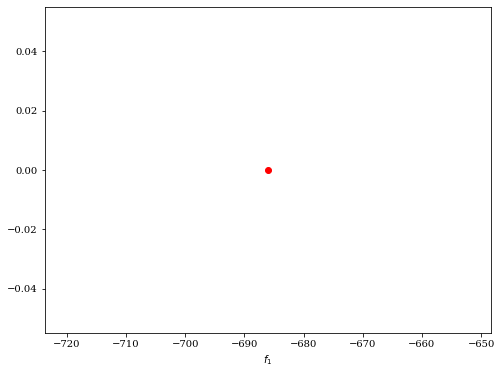

In [ ]:
import numpy as np

from pymoo.algorithms.so_genetic_algorithm import GA
from pymoo.factory import get_crossover, get_mutation, get_sampling
from pymoo.optimize import minimize
from pymoo.problems.single.knapsack import create_random_knapsack_problem

problem = create_random_knapsack_problem(30)

algorithm = GA(
    pop_size=200,
    sampling=get_sampling("bin_random"),
    crossover=get_crossover("bin_hux"),
    mutation=get_mutation("bin_bitflip"),
    eliminate_duplicates=True)

res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=True)

print("Best solution found: %s" % res.X.astype(int))
print("Function value: %s" % res.F)
print("Constraint violation: %s" % res.CV)

algorithm = NSGA2(pop_size=100,    sampling=get_sampling("bin_random"),
    crossover=get_crossover("bin_hux"),
    mutation=get_mutation("bin_bitflip"),
    eliminate_duplicates=True)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, color="red")
plot.show()

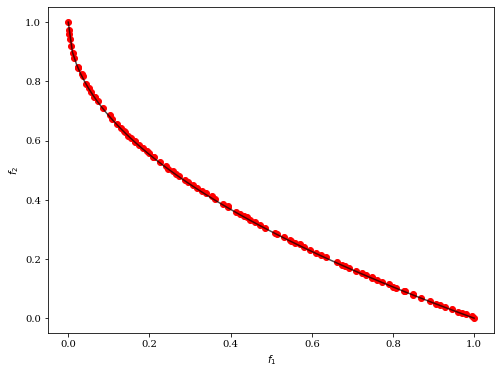

In [ ]:
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt1")

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, color="red")
plot.show()


In [4]:
from pgmpy.utils import get_example_model
from pgmpy.sampling import BayesianModelSampling

alarm_model = get_example_model('alarm')
samples = BayesianModelSampling(alarm_model).forward_sample(size=int(1e5))
samples.head()

Generating for node: VENTMACH:   0%|          | 0/37 [00:00<?, ?it/s] /Users/negfir/Documents/McGill/2nd Semester/COMP 766/Final Project/src/pgmpy/factors/discrete/DiscreteFactor.py:521: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  warn(
Generating for node: CVP: 100%|██████████| 37/37 [00:06<00:00,  5.87it/s]         


,MINVOLSET,VENTMACH,DISCONNECT,VENTTUBE,INTUBATION,PULMEMBOLUS,SHUNT,PAP,FIO2,KINKEDTUBE,...,HRBP,LVFAILURE,HISTORY,HYPOVOLEMIA,STROKEVOLUME,CO,BP,LVEDVOLUME,PCWP,CVP
0,NORMAL,NORMAL,FALSE,LOW,NORMAL,FALSE,NORMAL,NORMAL,NORMAL,FALSE,...,HIGH,FALSE,FALSE,FALSE,NORMAL,HIGH,HIGH,NORMAL,NORMAL,NORMAL
1,NORMAL,NORMAL,FALSE,LOW,NORMAL,FALSE,NORMAL,NORMAL,NORMAL,FALSE,...,HIGH,FALSE,FALSE,FALSE,NORMAL,HIGH,LOW,HIGH,HIGH,HIGH
2,NORMAL,NORMAL,FALSE,LOW,NORMAL,FALSE,NORMAL,NORMAL,NORMAL,FALSE,...,HIGH,FALSE,FALSE,FALSE,NORMAL,HIGH,HIGH,HIGH,HIGH,HIGH
3,NORMAL,NORMAL,TRUE,ZERO,NORMAL,TRUE,HIGH,HIGH,NORMAL,FALSE,...,HIGH,FALSE,FALSE,FALSE,NORMAL,HIGH,LOW,NORMAL,NORMAL,NORMAL
4,HIGH,HIGH,FALSE,HIGH,NORMAL,FALSE,NORMAL,NORMAL,NORMAL,FALSE,...,HIGH,FALSE,FALSE,FALSE,NORMAL,HIGH,HIGH,NORMAL,NORMAL,NORMAL


In [5]:
from pgmpy.models import BayesianModel

model_struct = BayesianModel(ebunch=alarm_model.edges())
model_struct.nodes()


from pgmpy.estimators import MaximumLikelihoodEstimator

mle = MaximumLikelihoodEstimator(model=model_struct, data=samples)

# Estimating the CPD for a single node.
print(mle.estimate_cpd(node='FIO2'))
print(mle.estimate_cpd(node='CVP'))

# Estimating CPDs for all the nodes in the model
mle.get_parameters()[:10]

+--------------+---------+
| FIO2(LOW)    | 0.04947 |
+--------------+---------+
| FIO2(NORMAL) | 0.95053 |
+--------------+---------+
+-------------+----------------------+---------------------+----------------------+
| LVEDVOLUME  | LVEDVOLUME(HIGH)     | LVEDVOLUME(LOW)     | LVEDVOLUME(NORMAL)   |
+-------------+----------------------+---------------------+----------------------+
| CVP(HIGH)   | 0.7022552098201541   | 0.00908781097353175 | 0.009048290799241939 |
+-------------+----------------------+---------------------+----------------------+
| CVP(LOW)    | 0.008183461794652203 | 0.9509258207429285  | 0.039100015674204534 |
+-------------+----------------------+---------------------+----------------------+
| CVP(NORMAL) | 0.28956132838519366  | 0.0399863682835397  | 0.9518516935265535   |
+-------------+----------------------+---------------------+----------------------+


[<TabularCPD representing P(ANAPHYLAXIS:2) at 0x133bb0fa0>,
 <TabularCPD representing P(ARTCO2:3 | VENTALV:4) at 0x133bb0ee0>,
 <TabularCPD representing P(BP:3 | CO:3, TPR:3) at 0x13562a4c0>,
 <TabularCPD representing P(CATECHOL:2 | ARTCO2:3, INSUFFANESTH:2, SAO2:3, TPR:3) at 0x13562abe0>,
 <TabularCPD representing P(CO:3 | HR:3, STROKEVOLUME:3) at 0x13562a790>,
 <TabularCPD representing P(CVP:3 | LVEDVOLUME:3) at 0x13562a610>,
 <TabularCPD representing P(DISCONNECT:2) at 0x13562ac10>,
 <TabularCPD representing P(ERRCAUTER:2) at 0x13563a340>,
 <TabularCPD representing P(ERRLOWOUTPUT:2) at 0x13563a3d0>,
 <TabularCPD representing P(EXPCO2:4 | ARTCO2:3, VENTLUNG:4) at 0x13563a550>]

In [3]:


from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianModel([('D', 'G'), ('I', 'G'), ('G', 'L'), ('I', 'S')])

# Defining individual CPDs.
cpd_d = TabularCPD(variable='D', variable_card=2, values=[[0.6], [0.4]])
cpd_i = TabularCPD(variable='I', variable_card=2, values=[[0.7], [0.3]])

# The representation of CPD in pgmpy is a bit different than the CPD shown in the above picture. In pgmpy the colums
# are the evidences and rows are the states of the variable. So the grade CPD is represented like this:
#
#    +---------+---------+---------+---------+---------+
#    | diff    | intel_0 | intel_0 | intel_1 | intel_1 |
#    +---------+---------+---------+---------+---------+
#    | intel   | diff_0  | diff_1  | diff_0  | diff_1  |
#    +---------+---------+---------+---------+---------+
#    | grade_0 | 0.3     | 0.05    | 0.9     | 0.5     |
#    +---------+---------+---------+---------+---------+
#    | grade_1 | 0.4     | 0.25    | 0.08    | 0.3     |
#    +---------+---------+---------+---------+---------+
#    | grade_2 | 0.3     | 0.7     | 0.02    | 0.2     |
#    +---------+---------+---------+---------+---------+

cpd_g = TabularCPD(variable='G', variable_card=3, 
                   values=[[0.3, 0.05, 0.9,  0.5],
                           [0.4, 0.25, 0.08, 0.3],
                           [0.3, 0.7,  0.02, 0.2]],
                  evidence=['I', 'D'],
                  evidence_card=[2, 2])

cpd_l = TabularCPD(variable='L', variable_card=2, 
                   values=[[0.1, 0.4, 0.99],
                           [0.9, 0.6, 0.01]],
                   evidence=['G'],
                   evidence_card=[3])

cpd_s = TabularCPD(variable='S', variable_card=2,
                   values=[[0.95, 0.2],
                           [0.05, 0.8]],
                   evidence=['I'],
                   evidence_card=[2])

# Associating the CPDs with the network
model.add_cpds(cpd_d, cpd_i, cpd_g, cpd_l, cpd_s)

# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly 
# defined and sum to 1.
model.check_model()



True

In [6]:
import pandas as pd
data = pd.DataFrame(data={'fruit': ["banana", "apple", "banana", "apple", "banana","apple", "banana", 
                                    "apple", "apple", "apple", "banana", "banana", "apple", "banana",], 
                          'tasty': ["yes", "no", "yes", "yes", "yes", "yes", "yes", 
                                    "yes", "yes", "yes", "yes", "no", "no", "no"], 
                          'size': ["large", "large", "large", "small", "large", "large", "large",
                                    "small", "large", "large", "large", "large", "small", "small"]})
print(data)

     fruit tasty   size
0   banana   yes  large
1    apple    no  large
2   banana   yes  large
3    apple   yes  small
4   banana   yes  large
5    apple   yes  large
6   banana   yes  large
7    apple   yes  small
8    apple   yes  large
9    apple   yes  large
10  banana   yes  large
11  banana    no  large
12   apple    no  small
13  banana    no  small


In [16]:
import pandas as pd
import numpy as np
from pgmpy.estimators import BDeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel

# create random data sample with 3 variables, where Z is dependent on X, Y:
data = pd.DataFrame(np.random.randint(0, 4, size=(5000, 2)), columns=list('XY'))
data['Z'] = data['X'] + data['Y']

bdeu = BDeuScore(data, equivalent_sample_size=5)
k2 = K2Score(data)
bic = BicScore(data)

model1 = BayesianModel([('X', 'Z'), ('Y', 'Z')])  # X -> Z <- Y
model2 = BayesianModel([('X', 'Z'), ('X', 'Y')])  # Y <- X -> Z


print(bdeu.score(model1))
print(k2.score(model1))
print(bic.score(model1))

print(bdeu.score(model2))
print(k2.score(model2))
print(bic.score(model2))

-13937.349686653142
-14328.058353893517
-14293.392855980299
-20892.249038354563
-20919.10934020581
-20936.302241545694


In [17]:
from pgmpy.estimators import ExhaustiveSearch

es = ExhaustiveSearch(data, scoring_method=bic)
best_model = es.estimate()
print(best_model.edges())

print("\nAll DAGs by score:")
for score, dag in reversed(es.all_scores()):
    print(score, dag.edges())

[('X', 'Z'), ('Y', 'Z')]

All DAGs by score:
-14293.392855980299 [('X', 'Z'), ('Y', 'Z')]
-14322.774329473341 [('Y', 'X'), ('Z', 'X'), ('Z', 'Y')]
-14322.774329473341 [('X', 'Y'), ('Z', 'X'), ('Z', 'Y')]
-14322.774329473343 [('Y', 'Z'), ('Y', 'X'), ('Z', 'X')]
-14322.774329473343 [('X', 'Z'), ('Y', 'Z'), ('Y', 'X')]
-14322.774329473345 [('X', 'Y'), ('X', 'Z'), ('Z', 'Y')]
-14322.774329473345 [('X', 'Y'), ('X', 'Z'), ('Y', 'Z')]
-16557.375553304166 [('Y', 'X'), ('Z', 'X')]
-16558.20603085891 [('X', 'Y'), ('Z', 'Y')]
-18672.319544221824 [('Z', 'X'), ('Z', 'Y')]
-18672.319544221824 [('X', 'Z'), ('Z', 'Y')]
-18672.319544221828 [('Y', 'Z'), ('Z', 'X')]
-20906.92076805265 [('Z', 'X')]
-20906.92076805265 [('X', 'Z')]
-20907.75124560739 [('Z', 'Y')]
-20907.751245607393 [('Y', 'Z')]
-20936.302241545694 [('X', 'Z'), ('Y', 'X')]
-20936.302241545694 [('X', 'Y'), ('Z', 'X')]
-20936.302241545694 [('X', 'Y'), ('X', 'Z')]
-20937.132719100435 [('Y', 'X'), ('Z', 'Y')]
-20937.13271910044 [('Y', 'Z'), ('Y

In [18]:


from pgmpy.estimators import HillClimbSearch

# create some data with dependencies
data = pd.DataFrame(np.random.randint(0, 3, size=(2500, 8)), columns=list('ABCDEFGH'))
data['A'] += data['B'] + data['C']
data['H'] = data['G'] - data['A']

hc = HillClimbSearch(data, scoring_method=BicScore(data))
best_model = hc.estimate()
print(best_model.edges())



  0%|          | 7/1000000 [00:00<17:16:26, 16.08it/s]

[('A', 'B'), ('A', 'C'), ('A', 'G'), ('B', 'C'), ('H', 'A'), ('H', 'G')]


In [26]:


data = pd.DataFrame(np.random.randint(0, 3, size=(2500, 6)), columns=list('ABCDEF'))
data['A'] += data['B'] + data['C']

data['E'] *= data['F']



In [27]:
es = ExhaustiveSearch(data, scoring_method=bic)
best_model = es.estimate()
print(best_model.edges())

print("\nAll DAGs by score:")
for score, dag in reversed(es.all_scores()):
    print(score, dag.edges())

KeyError: 'A'

In [21]:
from pgmpy.estimators import MmhcEstimator
from pgmpy.estimators import BDeuScore

data = pd.DataFrame(np.random.randint(0, 3, size=(2500, 8)), columns=list('ABCDEFGH'))
data['A'] += data['B'] + data['C']
data['H'] = data['G'] - data['A']
data['E'] *= data['F']

mmhc = MmhcEstimator(data)
skeleton = mmhc.mmpc()
print("Part 1) Skeleton: ", skeleton.edges())

# use hill climb search to orient the edges:
hc = HillClimbSearch(data, scoring_method=BDeuScore(data))
model = hc.estimate(tabu_length=10, white_list=skeleton.to_directed().edges())
print("Part 2) Model:    ", model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

Part 1) Skeleton:  []
Part 2) Model:     []


In [28]:
!brew install graphviz
!pip install pygraphviz

Updating Homebrew...
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> Updated Formulae
Updated 136 formulae.
==> Updated Casks
Updated 148 casks.

==> Downloading https://homebrew.bintray.com/bottles/libpng-1.6.37.catalina.bott
==> Downloading from https://d29vzk4ow07wi7.cloudfront.net/c8e74da602c21f978cd7e
######################################################################## 100.0%
==> Downloading https://homebrew.bintray.com/bottles/freetype-2.10.4.catalina.bo
==> Downloading from https://d29vzk4ow07wi7.cloudfront.net/b4e7683ae202c49280024
######################################################################## 100.0%
==> Downloading https://homebrew.bintray.com/bottles/fontconfig-2.13.1.catalina.
==> Downloading from https://d29vzk4ow07wi7.cloudfront.net/64ff208b28613dfe2a65b
######################################################################## 100.0%
==> Downloading https://homebrew.bintray.com/bottles/jpeg-9d.catalina.bottle.tar
==> Downloadin

######################################################################## 100.0%
==> Downloading https://homebrew.bintray.com/bottles/graphviz-2.47.0.catalina.bo
==> Downloading from https://d29vzk4ow07wi7.cloudfront.net/e5d3b7b652e5cf828c0a2
######################################################################## 100.0%
==> Installing dependencies for graphviz: libpng, freetype, fontconfig, jpeg, libtiff, webp, gd, gettext, libffi, pcre, glib, jasper, netpbm, gts, libpthread-stubs, xorgproto, libxau, libxdmcp, libxcb, libx11, libxext, libxrender, lzo, pixman, cairo, gdk-pixbuf, fribidi, gobject-introspection, graphite2, harfbuzz, pango, librsvg and libtool
==> Installing graphviz dependency: libpng
==> Pouring libpng-1.6.37.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/libpng/1.6.37: 27 files, 1.2MB
==> Installing graphviz dependency: freetype
==> Pouring freetype-2.10.4.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/freetype/2.10.4: 64 files, 2.3MB
==> Installing graphviz dependency: fontc

==> Pouring graphviz-2.47.0.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/graphviz/2.47.0: 301 files, 10.5MB
==> Caveats
==> libffi
libffi is keg-only, which means it was not symlinked into /usr/local,
because macOS already provides this software and installing another version in
parallel can cause all kinds of trouble.

For compilers to find libffi you may need to set:
  export LDFLAGS="-L/usr/local/opt/libffi/lib"
  export CPPFLAGS="-I/usr/local/opt/libffi/include"

For pkg-config to find libffi you may need to set:
  export PKG_CONFIG_PATH="/usr/local/opt/libffi/lib/pkgconfig"

==> libtool
In order to prevent conflicts with Apple's own libtool we have prepended a "g"
so, you have instead: glibtool and glibtoolize.
     |████████████████████████████████| 118 kB 4.4 MB/s eta 0:00:01
  Created wheel for pygraphviz: filename=pygraphviz-1.7-cp39-cp39-macosx_10_15_x86_64.whl size=101192 sha256=962dbad626c9a21347e9b4c59a88d898cc3c8b85ab6d28725f005246e6040cff
  Stored in directory: /Users/neg

In [34]:
!python -m pip install seaborn

     |████████████████████████████████| 285 kB 2.9 MB/s eta 0:00:01


In [30]:
!pip install pomegranate

     |████████████████████████████████| 7.2 MB 336 kB/s eta 0:00:01
     |████████████████████████████████| 259 kB 2.4 MB/s eta 0:00:01


Populating the interactive namespace from numpy and matplotlib
((), (), (), (1,), (), (4,), (3,))


array([[0, 2, 0, 2, 1, 1, 2],
       [2, 2, 1, 2, 2, 2, 2],
       [2, 2, 2, 2, 0, 0, 2],
       [2, 1, 2, 1, 0, 0, 1],
       [2, 1, 0, 1, 0, 0, 1],
       [1, 1, 0, 1, 0, 0, 1],
       [2, 1, 0, 1, 2, 2, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 2, 2, 0],
       [0, 1, 0, 1, 2, 2, 1],
       [0, 2, 1, 2, 1, 1, 2],
       [1, 1, 1, 1, 1, 1, 1],
       [2, 2, 0, 2, 2, 2, 2],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1],
       [0, 2, 2, 2, 0, 0, 2],
       [0, 2, 2, 2, 0, 0, 2],
       [0, 0, 0, 0, 0, 0, 0],
       [2, 2, 0, 2, 1, 1, 2],
       [1, 2, 1, 2, 1, 1, 2],
       [0, 0, 1, 0, 1, 1, 0],
       [1, 2, 1, 2, 0, 0, 2],
       [0, 0, 0, 0, 2, 2, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [2, 1, 0, 1, 2, 2, 1],
       [2, 0, 0, 0, 1, 1, 0],
       [0, 1, 0, 1, 1, 1, 1],
       [2, 2, 0, 2, 2, 2, 2],
       [0, 2, 0, 2, 1, 1, 2],
       [1, 2, 2, 2, 2, 2, 2],
       [1, 2, 2, 2, 1, 1, 2],
       [1, 1, 1, 1, 1, 1, 1],
       [1,

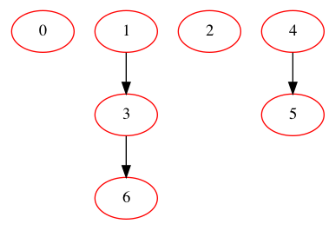

In [70]:
%pylab inline
# %load_ext memory_profiler
from pomegranate import BayesianNetwork
import seaborn, time
seaborn.set_style('whitegrid')

X = numpy.random.randint(3, size=(50, 7))
X[:,3] = X[:,1]
X[:,6] = X[:,1]

X[5:10,0] = X[10:15,2] + X[5:10,1]

X[:,4] = X[:,5]

model = BayesianNetwork.from_samples(X, algorithm='exact')
print(model.structure)
model.plot()

X

In [167]:
def fitnessFunc(chromosome):
    """F1 Sphere model
    unimodal, symmetric, separable"""
    fitness = 0
    for i in range(len(chromosome)):
        fitness += chromosome[i]**2
    return fitness

chromosome = [2, 5, 7]
fitnessFunc(chromosome)

var1 = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
var2 = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
var3 = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])



# combination of elements of array_1,
# array_2 and array_3 using 
# numpy.meshgrid().T.reshape()
chromosome = np.array(
  np.meshgrid(var1, var2, var3)).T.reshape(-1, 3)
  
print("\nCombine array:")


idx = np.random.randint(low=0, high=1331, size=100)
selected = []
for i in idx:
    fit = fitnessFunc(chromosome[i])
#     print((chromosome[i],fit))
#     print(np.concatenate((chromosome[i],fit),axis=0))
    selected.append(list(np.append(chromosome[i],fit)))
    
selected = np.asarray(selected)
df = pd.DataFrame(selected)
print(df) 
df = df.sort_values(by=[3])
print(df)

X_raw = df.drop(columns=[3]).values
print(X_raw)



Combine array:
    0  1  2   3
0   5  2  0  29
1  -4  3 -1  26
2  -4  0 -1  17
3   5  1  3  35
4  -4  5  2  45
.. .. .. ..  ..
95  1 -1 -4  18
96 -1 -4 -2  21
97  4  5 -4  57
98  5  4  5  66
99 -5  1  2  30

[100 rows x 4 columns]
    0  1  2   3
56  0  0  1   1
87  0  0 -1   1
13 -1  0  0   1
47 -1 -1  0   2
60  1 -2  0   5
.. .. .. ..  ..
49  5 -4  4  57
75  5  3 -5  59
24 -5  5  4  66
98  5  4  5  66
41  5 -5 -5  75

[100 rows x 4 columns]
[[ 0  0  1]
 [ 0  0 -1]
 [-1  0  0]
 [-1 -1  0]
 [ 1 -2  0]
 [ 2  1  0]
 [-1 -1 -2]
 [-1  1 -2]
 [-3  0  0]
 [ 2  2 -1]
 [ 0 -1  3]
 [ 0  3 -1]
 [-1  1 -3]
 [-1 -3  1]
 [-1 -1 -3]
 [-2 -1 -3]
 [-1 -3 -2]
 [-3 -2 -1]
 [-1  2 -3]
 [ 0  4  1]
 [ 2  3  2]
 [ 2  2  3]
 [ 3 -2  2]
 [-4  0 -1]
 [ 1 -1 -4]
 [ 1  4  1]
 [-1  1  4]
 [-1 -1  4]
 [-1  3  3]
 [ 3 -1  3]
 [ 4  1  2]
 [-1 -4 -2]
 [ 2  3  3]
 [ 4 -2 -2]
 [-4 -2  2]
 [-5  0  1]
 [-4  3 -1]
 [-3 -1 -4]
 [ 4  3  1]
 [-3 -1  4]
 [-1  3  4]
 [ 3 -2 -4]
 [ 2  5  0]
 [ 5  0 -2]
 [ 5  2  0]
 [-3  2 -4]


In [173]:
def bitEncoder(chrom):
    arr = []
    for n in chrom:
        bin = np.binary_repr(n, width=4)
        digits =  [int(x) for x in str(bin)]
        
        arr = np.append(arr,digits)
#         print(arr)
    return arr

X = []
for idx,i in enumerate(X_raw):
    coded = bitEncoder(i)
    X.append(list(coded))
X = np.asarray(X)
print(X)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 0. 1. ... 1. 0. 0.]
 [0. 1. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 0. 1. 1.]]


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_class=10, return_X_y=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


((1797, 64), (1797,))

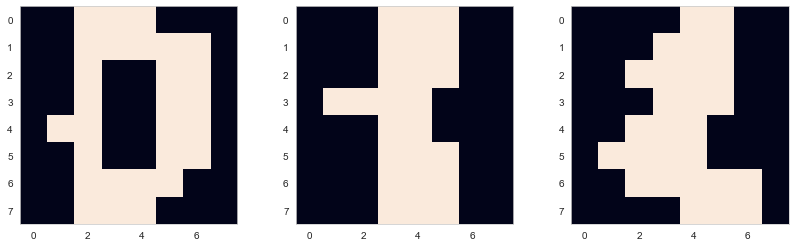

In [124]:


from sklearn.datasets import load_digits

X, y = load_digits(10, True)
X = X > numpy.mean(X)

plt.figure(figsize=(14, 4))
plt.subplot(131)
plt.imshow(X[0].reshape(8, 8), interpolation='nearest')
plt.grid(False)
plt.subplot(132)
plt.imshow(X[1].reshape(8, 8), interpolation='nearest')
plt.grid(False)
plt.subplot(133)
plt.imshow(X[2].reshape(8, 8), interpolation='nearest')
plt.grid(False)
X.shape, y.shape


Shortest Path
Time (s):  0.23193097114562988
P(D|M):  -697.9289645534063

A* Search
Time (s):  0.13453197479248047
P(D|M):  -697.9289645534063


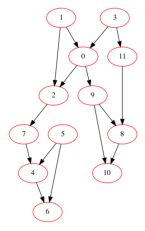

In [174]:
# X = X[:,:18]
    
tic = time.time()
model = BayesianNetwork.from_samples(X, algorithm='exact-dp') # << BNSL done here!
t1 = time.time() - tic
p1 = model.log_probability(X).sum()
model.plot()
tic = time.time()
model = BayesianNetwork.from_samples(X, algorithm='exact')
t2 = time.time() - tic
p2 = model.log_probability(X).sum()


print("Shortest Path")
print("Time (s): ", t1)
print("P(D|M): ", p1)
# %memit BayesianNetwork.from_samples(X, algorithm='exact-dp')
print()
print("A* Search")
print("Time (s): ", t2)
print("P(D|M): ", p2)
model.plot()
# %memit BayesianNetwork.from_samples(X, algorithm='exact')

Greedy
Time (s):  0.01512289047241211
P(D|M):  -702.4340239419441


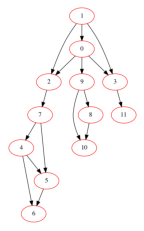

In [175]:
tic = time.time()
model = BayesianNetwork.from_samples(X) # << Default BNSL setting
t = time.time() - tic
p = model.log_probability(X).sum()

print("Greedy")
print("Time (s): ", t)
print("P(D|M): ", p)
model.plot()
# %memit BayesianNetwork.from_samples(X)

Chow-Liu
Time (s):  0.0074350833892822266
P(D|M):  -757.8737570768039
[[0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.]] 3.0


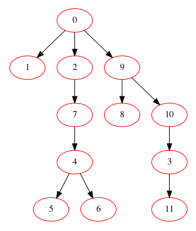

In [176]:
tic = time.time()
model = BayesianNetwork.from_samples(X, algorithm='chow-liu') # << Default BNSL setting
t = time.time() - tic
p = model.log_probability(X).sum()

print("Chow-Liu")
print("Time (s): ", t)
print("P(D|M): ", p)
model.plot()
test = model.sample()
print(test,fitnessFunc(test[0]))
# %memit BayesianNetwork.from_samples(X, algorithm='chow-liu')

In [177]:
X, _ = load_digits(10, True)
X = X > numpy.mean(X)

t1, t2, t3, t4 = [], [], [], []
p1, p2, p3, p4 = [], [], [], []
n_vars = range(8, 19)

for i in n_vars:
    X_ = X[:,:i]

    tic = time.time()
    model = BayesianNetwork.from_samples(X_, algorithm='exact-dp') # << BNSL done here!
    t1.append(time.time() - tic)
    p1.append(model.log_probability(X_).sum())
#     model.plot()

    tic = time.time()
    model = BayesianNetwork.from_samples(X_, algorithm='exact')
    t2.append(time.time() - tic)
    p2.append(model.log_probability(X_).sum())
#     model.plot()

    tic = time.time()
    model = BayesianNetwork.from_samples(X_, algorithm='greedy')
    t3.append(time.time() - tic)
    p3.append(model.log_probability(X_).sum())
#     model.plot()

    tic = time.time()
    model = BayesianNetwork.from_samples(X_, algorithm='chow-liu')
    t4.append(time.time() - tic)
    p4.append(model.log_probability(X_).sum())
#     model.plot()




/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_class=10, return_X_y=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [ ]:
X, _ = load_digits(10, True)
X = X > numpy.mean(X)

t1, t2, t3, t4 = [], [], [], []
p1, p2, p3, p4 = [], [], [], []
n_vars = range(8, 19)

for i in n_vars:
    X_ = X[:,:i]

    tic = time.time()
    model = BayesianNetwork.from_samples(X_, algorithm='exact-dp') # << BNSL done here!
    t1.append(time.time() - tic)
    p1.append(model.log_probability(X_).sum())
#     model.plot()

    tic = time.time()
    model = BayesianNetwork.from_samples(X_, algorithm='exact')
    t2.append(time.time() - tic)
    p2.append(model.log_probability(X_).sum())
#     model.plot()

    tic = time.time()
    model = BayesianNetwork.from_samples(X_, algorithm='greedy')
    t3.append(time.time() - tic)
    p3.append(model.log_probability(X_).sum())
#     model.plot()

    tic = time.time()
    model = BayesianNetwork.from_samples(X_, algorithm='chow-liu')
    t4.append(time.time() - tic)
    p4.append(model.log_probability(X_).sum())
#     model.plot()




In [236]:
t1, t2, t3, t4 = [], [], [], []
p1, p2, p3, p4 = [], [], [], []
n_vars = [6,9,12,15]

var = np.array([-4, -3, -2, -1, 0, 1, 2, 3])
chromosome = np.array(
  np.meshgrid(var,var)).T.reshape(-1, 2)

idx = np.random.randint(low=0, high=64, size=6)
selected = []
for i in idx:
    fit = fitnessFunc(chromosome[i])
    selected.append(list(np.append(chromosome[i],fit)))

df = pd.DataFrame(selected)
df = df.sort_values(by=[2])
X_raw = df.drop(columns=[2])
X_raw = X_raw.head(3).values

X = []
for idx,i in enumerate(X_raw):
    coded = bitEncoder(i)
    X.append(list(coded))
X_ = np.asarray(X)
# print(X)



tic = time.time()
model = BayesianNetwork.from_samples(X_, algorithm='exact-dp') # << BNSL done here!
t1.append(time.time() - tic)
p1.append(model.log_probability(X_).sum())
#     model.plot()



tic = time.time()
model = BayesianNetwork.from_samples(X_, algorithm='greedy')
t3.append(time.time() - tic)
p3.append(model.log_probability(X_).sum())
#     model.plot()

tic = time.time()
model = BayesianNetwork.from_samples(X_, algorithm='chow-liu')
t4.append(time.time() - tic)
p4.append(model.log_probability(X_).sum())



print("#####################################################")
var = np.array([-4, -3, -2, -1, 0, 1, 2, 3])
chromosome = np.array(
  np.meshgrid(var,var,var)).T.reshape(-1, 3)

idx = np.random.randint(low=0, high=512, size=50)
selected = []
for i in idx:
    fit = fitnessFunc(chromosome[i])
    selected.append(list(np.append(chromosome[i],fit)))

df = pd.DataFrame(selected)
df = df.sort_values(by=[3])
X_raw = df.drop(columns=[3])
X_raw = X_raw.head(25).values

X = []
for idx,i in enumerate(X_raw):
    coded = bitEncoder(i)
    X.append(list(coded))
X_ = np.asarray(X)
# print(X)


tic = time.time()
model = BayesianNetwork.from_samples(X_, algorithm='exact-dp') # << BNSL done here!
t1.append(time.time() - tic)
p1.append(model.log_probability(X_).sum())
#     model.plot()


#     model.plot()

tic = time.time()
model = BayesianNetwork.from_samples(X_, algorithm='greedy')
t3.append(time.time() - tic)
p3.append(model.log_probability(X_).sum())
#     model.plot()

tic = time.time()
model = BayesianNetwork.from_samples(X_, algorithm='chow-liu')
t4.append(time.time() - tic)
p4.append(model.log_probability(X_).sum())


print("#####################################################")
var = np.array([-4, -3, -2, -1, 0, 1, 2, 3])
chromosome = np.array(
  np.meshgrid(var,var,var,var)).T.reshape(-1, 4)

idx = np.random.randint(low=0, high=4096, size=400)
selected = []
for i in idx:
    fit = fitnessFunc(chromosome[i])
    selected.append(list(np.append(chromosome[i],fit)))

df = pd.DataFrame(selected)
df = df.sort_values(by=[4])
X_raw = df.drop(columns=[4])
X_raw = X_raw.head(200).values
X = []
for idx,i in enumerate(X_raw):
    coded = bitEncoder(i)
    X.append(list(coded))
X_ = np.asarray(X)
# print(X)


tic = time.time()
model = BayesianNetwork.from_samples(X_, algorithm='exact-dp') # << BNSL done here!
t1.append(time.time() - tic)
p1.append(model.log_probability(X_).sum())
#     model.plot()


#     model.plot()

tic = time.time()
model = BayesianNetwork.from_samples(X_, algorithm='greedy')
t3.append(time.time() - tic)
p3.append(model.log_probability(X_).sum())
#     model.plot()

tic = time.time()
model = BayesianNetwork.from_samples(X_, algorithm='chow-liu')
t4.append(time.time() - tic)
p4.append(model.log_probability(X_).sum())


print("#####################################################")
var = np.array([-4, -3, -2, -1, 0, 1, 2, 3])
chromosome = np.array(
  np.meshgrid(var,var,var,var,var)).T.reshape(-1, 5)

idx = np.random.randint(low=0, high=32768, size=3000)
selected = []
for i in idx:
    fit = fitnessFunc(chromosome[i])
    selected.append(list(np.append(chromosome[i],fit)))

df = pd.DataFrame(selected)
df = df.sort_values(by=[5])
X_raw = df.drop(columns=[5])
X_raw = X_raw.head(1500).values
X = []
for idx,i in enumerate(X_raw):
    coded = bitEncoder(i)
    X.append(list(coded))
X_ = np.asarray(X)
print(X_.shape)

tic = time.time()
model = BayesianNetwork.from_samples(X_, algorithm='exact-dp') # << BNSL done here!
t1.append(time.time() - tic)
p1.append(model.log_probability(X_).sum())
#     model.plot()



tic = time.time()
model = BayesianNetwork.from_samples(X_, algorithm='greedy')
t3.append(time.time() - tic)
p3.append(model.log_probability(X_).sum())
#     model.plot()

tic = time.time()
model = BayesianNetwork.from_samples(X_, algorithm='chow-liu')
t4.append(time.time() - tic)
p4.append(model.log_probability(X_).sum())

#####################################################
#####################################################
#####################################################
(1500, 20)


In [235]:
var = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
chromosome = np.array(
  np.meshgrid(var,var)).T.reshape(-1, 2)

idx = np.random.randint(low=0, high=121, size=12)
selected = []
for i in idx:
    fit = fitnessFunc(chromosome[i])
    selected.append(list(np.append(chromosome[i],fit)))

df = pd.DataFrame(selected)
df = df.sort_values(by=[2])
X_raw = df.drop(columns=[2])
X_raw = X_raw.head(6).values
print(X_raw)
X = []
for idx,i in enumerate(X_raw):
    coded = bitEncoder(i)
    X.append(list(coded))
X_ = np.asarray(X)

    0  1
2   1 -1
3   1 -1
7   1 -2
10  0  3
11 -3  0
1  -1 -3
4  -1 -4
9   1 -4
5   4  3
0   1  5
6   1 -5
8   5 -3
[[ 1 -1]
 [ 1 -1]
 [ 1 -2]
 [ 0  3]
 [-3  0]
 [-1 -3]]


In [238]:
t1, t2, t3, t4 = [], [], [], []
p1, p2, p3, p4 = [], [], [], []
n_vars = [2,3,4,5]

var = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
chromosome = np.array(
  np.meshgrid(var,var)).T.reshape(-1, 2)

idx = np.random.randint(low=0, high=121, size=12)
selected = []
for i in idx:
    fit = fitnessFunc(chromosome[i])
    selected.append(list(np.append(chromosome[i],fit)))

df = pd.DataFrame(selected)
df = df.sort_values(by=[2])
X_raw = df.drop(columns=[2])
X_raw = X_raw.head(6).values

X = []
for idx,i in enumerate(X_raw):
    coded = bitEncoder(i)
    X.append(list(coded))
X_ = np.asarray(X)
# print(X)



tic = time.time()
model = BayesianNetwork.from_samples(X_, algorithm='exact-dp') # << BNSL done here!
t1.append(time.time() - tic)
p1.append(model.log_probability(X_).sum())
#     model.plot()



tic = time.time()
model = BayesianNetwork.from_samples(X_, algorithm='greedy')
t3.append(time.time() - tic)
p3.append(model.log_probability(X_).sum())
#     model.plot()

tic = time.time()
model = BayesianNetwork.from_samples(X_, algorithm='chow-liu')
t4.append(time.time() - tic)
p4.append(model.log_probability(X_).sum())



print("#####################################################")
var = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
chromosome = np.array(
  np.meshgrid(var,var,var)).T.reshape(-1, 3)

idx = np.random.randint(low=0, high=1331, size=130)
selected = []
for i in idx:
    fit = fitnessFunc(chromosome[i])
    selected.append(list(np.append(chromosome[i],fit)))

df = pd.DataFrame(selected)
df = df.sort_values(by=[3])
X_raw = df.drop(columns=[3])
X_raw = X_raw.head(70).values
X = []
for idx,i in enumerate(X_raw):
    coded = bitEncoder(i)
    X.append(list(coded))
X_ = np.asarray(X)
# print(X)


tic = time.time()
model = BayesianNetwork.from_samples(X_, algorithm='exact-dp') # << BNSL done here!
t1.append(time.time() - tic)
p1.append(model.log_probability(X_).sum())
#     model.plot()


#     model.plot()

tic = time.time()
model = BayesianNetwork.from_samples(X_, algorithm='greedy')
t3.append(time.time() - tic)
p3.append(model.log_probability(X_).sum())
#     model.plot()

tic = time.time()
model = BayesianNetwork.from_samples(X_, algorithm='chow-liu')
t4.append(time.time() - tic)
p4.append(model.log_probability(X_).sum())


print("#####################################################")
var = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
chromosome = np.array(
  np.meshgrid(var,var,var,var)).T.reshape(-1, 4)

idx = np.random.randint(low=0, high=14641, size=1400)
selected = []
for i in idx:
    fit = fitnessFunc(chromosome[i])
    selected.append(list(np.append(chromosome[i],fit)))

df = pd.DataFrame(selected)
df = df.sort_values(by=[4])
X_raw = df.drop(columns=[4])
X_raw = X_raw.head(700).values
X = []
for idx,i in enumerate(X_raw):
    coded = bitEncoder(i)
    X.append(list(coded))
X_ = np.asarray(X)
# print(X)


tic = time.time()
model = BayesianNetwork.from_samples(X_, algorithm='exact-dp') # << BNSL done here!
t1.append(time.time() - tic)
p1.append(model.log_probability(X_).sum())
#     model.plot()


#     model.plot()

tic = time.time()
model = BayesianNetwork.from_samples(X_, algorithm='greedy')
t3.append(time.time() - tic)
p3.append(model.log_probability(X_).sum())
#     model.plot()

tic = time.time()
model = BayesianNetwork.from_samples(X_, algorithm='chow-liu')
t4.append(time.time() - tic)
p4.append(model.log_probability(X_).sum())


#####################################################
#####################################################


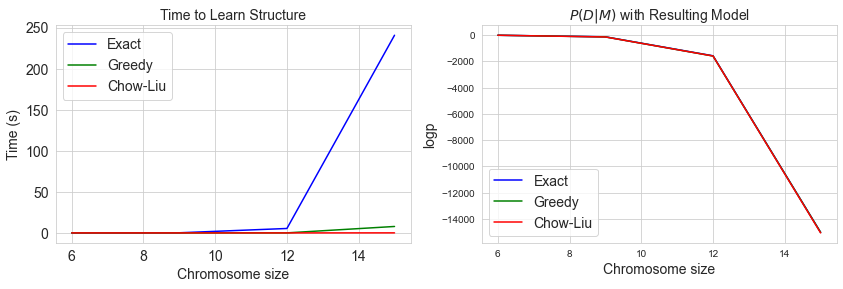

In [237]:
# n_vars = [8,12,16,20]


plt.figure(figsize=(14, 4))
plt.subplot(121)
plt.title("Time to Learn Structure", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Time (s)", fontsize=14)
plt.xlabel("Chromosome size", fontsize=14)
plt.plot(n_vars, t1, c='b', label="Exact")
# plt.plot(n_vars, t2, c='m', label="Exact A*")
plt.plot(n_vars, t3, c='g', label="Greedy")
plt.plot(n_vars, t4, c='r', label="Chow-Liu")
plt.legend(fontsize=14, loc=2)

plt.subplot(122)
plt.title("$P(D|M)$ with Resulting Model", fontsize=14)
plt.xlabel("Chromosome size", fontsize=14)
plt.ylabel("logp", fontsize=14)
plt.plot(n_vars, p1, c='b', label="Exact")
# plt.plot(n_vars, p2, c='m', label="Exact A*")
plt.plot(n_vars, p3, c='g', label="Greedy")
plt.plot(n_vars, p4, c='r', label="Chow-Liu")
plt.legend(fontsize=14)



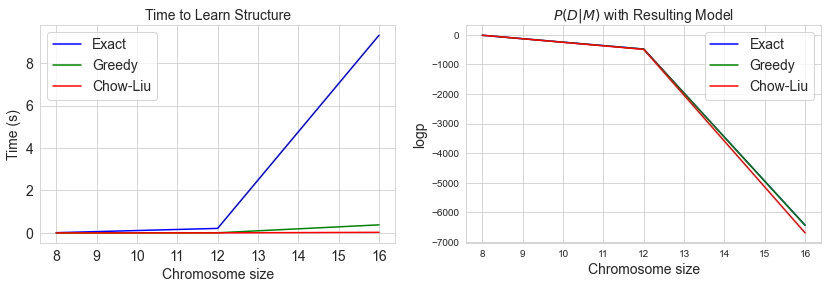

In [239]:
n_vars = [8,12,16]


plt.figure(figsize=(14, 4))
plt.subplot(121)
plt.title("Time to Learn Structure", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Time (s)", fontsize=14)
plt.xlabel("Chromosome size", fontsize=14)
plt.plot(n_vars, t1[0:3], c='b', label="Exact")
# plt.plot(n_vars, t2, c='m', label="Exact A*")
plt.plot(n_vars, t3[0:3], c='g', label="Greedy")
plt.plot(n_vars, t4[0:3], c='r', label="Chow-Liu")
plt.legend(fontsize=14, loc=2)

plt.subplot(122)
plt.title("$P(D|M)$ with Resulting Model", fontsize=14)
plt.xlabel("Chromosome size", fontsize=14)
plt.ylabel("logp", fontsize=14)
plt.plot(n_vars, p1[0:3], c='b', label="Exact")
# plt.plot(n_vars, p2, c='m', label="Exact A*")
plt.plot(n_vars, p3[0:3], c='g', label="Greedy")
plt.plot(n_vars, p4[0:3], c='r', label="Chow-Liu")
plt.legend(fontsize=14)

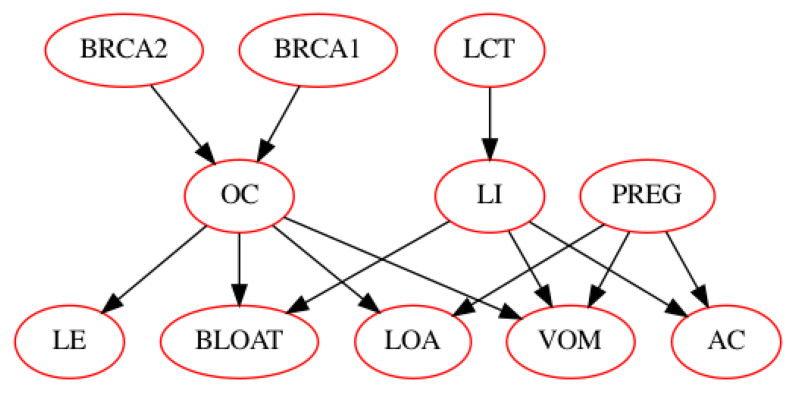

In [53]:
from pomegranate import DiscreteDistribution, ConditionalProbabilityTable, Node

BRCA1 = DiscreteDistribution({0: 0.999, 1: 0.001})
BRCA2 = DiscreteDistribution({0: 0.985, 1: 0.015})
LCT   = DiscreteDistribution({0: 0.950, 1: 0.050})

OC = ConditionalProbabilityTable([[0, 0, 0, 0.999],
                                  [0, 0, 1, 0.001],
                                  [0, 1, 0, 0.750],
                                  [0, 1, 1, 0.250],
                                  [1, 0, 0, 0.700],
                                  [1, 0, 1, 0.300],
                                  [1, 1, 0, 0.050],
                                  [1, 1, 1, 0.950]], [BRCA1, BRCA2])

LI = ConditionalProbabilityTable([[0, 0, 0.99],
                                  [0, 1, 0.01],
                                  [1, 0, 0.20],
                                  [1, 1, 0.80]], [LCT])

PREG = DiscreteDistribution({0: 0.90, 1: 0.10})

LE = ConditionalProbabilityTable([[0, 0, 0.99],
                                  [0, 1, 0.01],
                                  [1, 0, 0.25],
                                  [1, 1, 0.75]], [OC])

BLOAT = ConditionalProbabilityTable([[0, 0, 0, 0.85],
                                     [0, 0, 1, 0.15],
                                     [0, 1, 0, 0.70],
                                     [0, 1, 1, 0.30],
                                     [1, 0, 0, 0.40],
                                     [1, 0, 1, 0.60],
                                     [1, 1, 0, 0.10],
                                     [1, 1, 1, 0.90]], [OC, LI])

LOA = ConditionalProbabilityTable([[0, 0, 0, 0.99],
                                   [0, 0, 1, 0.01],
                                   [0, 1, 0, 0.30],
                                   [0, 1, 1, 0.70],
                                   [1, 0, 0, 0.95],
                                   [1, 0, 1, 0.05],
                                   [1, 1, 0, 0.95],
                                   [1, 1, 1, 0.05]], [PREG, OC])

VOM = ConditionalProbabilityTable([[0, 0, 0, 0, 0.99],
                                   [0, 0, 0, 1, 0.01],
                                   [0, 0, 1, 0, 0.80],
                                   [0, 0, 1, 1, 0.20],
                                   [0, 1, 0, 0, 0.40],
                                   [0, 1, 0, 1, 0.60],
                                   [0, 1, 1, 0, 0.30],
                                   [0, 1, 1, 1, 0.70],
                                   [1, 0, 0, 0, 0.30],
                                   [1, 0, 0, 1, 0.70],
                                   [1, 0, 1, 0, 0.20],
                                   [1, 0, 1, 1, 0.80],
                                   [1, 1, 0, 0, 0.05],
                                   [1, 1, 0, 1, 0.95],
                                   [1, 1, 1, 0, 0.01],
                                   [1, 1, 1, 1, 0.99]], [PREG, OC, LI])

AC = ConditionalProbabilityTable([[0, 0, 0, 0.95],
                                  [0, 0, 1, 0.05],
                                  [0, 1, 0, 0.01],
                                  [0, 1, 1, 0.99],
                                  [1, 0, 0, 0.40],
                                  [1, 0, 1, 0.60],
                                  [1, 1, 0, 0.20],
                                  [1, 1, 1, 0.80]], [PREG, LI])

s1 = Node(BRCA1, name="BRCA1")
s2 = Node(BRCA2, name="BRCA2")
s3 = Node(LCT, name="LCT")
s4 = Node(OC, name="OC")
s5 = Node(LI, name="LI")
s6 = Node(PREG, name="PREG")
s7 = Node(LE, name="LE")
s8 = Node(BLOAT, name="BLOAT")
s9 = Node(LOA, name="LOA")
s10 = Node(VOM, name="VOM")
s11 = Node(AC, name="AC")

model = BayesianNetwork("Hut")
model.add_nodes(s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11)
model.add_edge(s1, s4)
model.add_edge(s2, s4)
model.add_edge(s3, s5)
model.add_edge(s4, s7)
model.add_edge(s4, s8)
model.add_edge(s4, s9)
model.add_edge(s4, s10)
model.add_edge(s5, s8)
model.add_edge(s5, s10)
model.add_edge(s5, s11)
model.add_edge(s6, s9)
model.add_edge(s6, s10)
model.add_edge(s6, s11)
model.bake()

plt.figure(figsize=(14, 10))
model.plot()
plt.show()